# [Introduction to Data Science](http://datascience-intro.github.io/1MS041-2023/)    
## 1MS041, 2023 
&copy;2023 Raazesh Sainudiin, Benny Avelin. [Attribution 4.0 International     (CC BY 4.0)](https://creativecommons.org/licenses/by/4.0/)

In [1]:
from Utils import showURL

In [2]:
showURL("https://en.wikipedia.org/wiki/Continuous_uniform_distribution")

## Integrate the uniform distribution using Sympy and simulate

In [3]:
from sympy import var, integrate

In [4]:
a = var('a')
b = var('b')
x = var('x')

In [5]:
f=1/(b-a)

In [6]:
F_prim = integrate(f,x)

In [7]:
# We need that F(a) = 0
# F(a) = F_prim(a) + C
# C = -F_prim(a)

F = F_prim - a/(b-a)
F

-a/(-a + b) + x/(-a + b)

We basically start by solving for $y$
$$
    F(x) = y
$$
This is solvable because F is strictly increasing at least in the interval $x \in (a,b)$. 

$$
    F(x) = y
$$
$$
    \frac{x-a}{b-a} = y
$$

$$
    F^{-1}(y) = y(b-a)+a
$$

In [8]:
import numpy as np
y = np.random.uniform(0,1,10000)
x = y*(20-10)+10

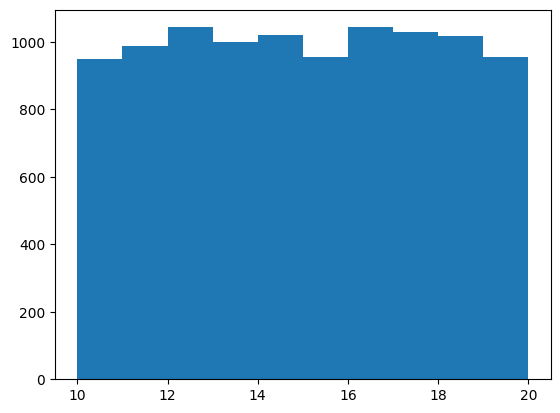

In [9]:
import matplotlib.pyplot as plt
_=plt.hist(x)

## Inversion sampling

Inversion sampling starts with a distribution function $F$. We want to simulate from $F$. We first compute $F^{-1}(y)$ and then we let $X$ be a uniform $(0,1)$ random variable and then we define
$$
    Y = F^{-1}(X)
$$
then $Y$ has distribution function $F$.

$$
    F_Y(y) = P(Y \leq y) = P(F^{-1}(X) \leq y) = P(X \leq F(y))
$$
Rename $F(y) = x$ then 
$$
    P(X \leq x) = F_X(x) = F_X(F(y))
$$

Since $X$ is uniform $(0,1)$ we have that $F_X(x) = x$ if $x \in (0,1)$

Conclusion is that $F_Y(y) = F(y)$.

## Integrating the exponential and inversion sampling

In [10]:
showURL("https://en.wikipedia.org/wiki/Exponential_distribution")

In [11]:
lam = var('lambda')
x = var('x')
from sympy import exp
f = lam*exp(-lam*x)
f

lambda*exp(-lambda*x)

In [12]:
F_prim = integrate(f,x)

In [13]:
F_prim

-exp(-lambda*x)

In [14]:
F = F_prim+1
F

1 - exp(-lambda*x)

$$
    F(x) = y
$$
$$
    1-e^{-\lambda x} = y
$$
$$
    1-y = e^{-\lambda x}
$$

$$
    \ln(1-y)/(-\lambda) =  x
$$
$$
    F^{-1}(y) = \frac{\ln(1-y)}{-\lambda}
$$

In [15]:
y = np.random.uniform(0,1,10000)
x = np.log(1-y)/(-1)

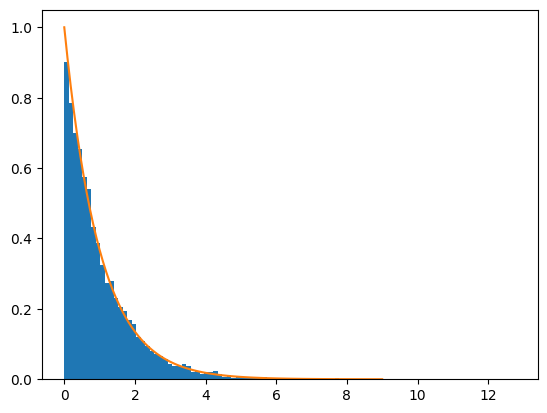

In [16]:
_=plt.hist(x,bins=100,density=True)
x_plot = np.linspace(0,9,100)
plt.plot(x_plot,np.exp(-x_plot))

## Loading the co2 data and plotting

In [17]:
%%bash
ls data

CORIS.csv
NYPowerBall.csv
auto.csv
co2_mm_mlo.txt
digits.csv
earthquakes.csv
earthquakes.csv.zip
earthquakes.tgz
earthquakes_small.csv
final.csv
final.csv.zip
final.tgz
flights.csv
indoor_train.csv
leukemia.csv
mammography.mat
portland.csv
pride_and_prejudice.txt
rainfallInChristchurch.csv
ratings.csv
spam.csv
visits_clean.csv


In [18]:
%%bash
head -n 100 data/co2_mm_mlo.txt

# --------------------------------------------------------------------
# USE OF NOAA ESRL DATA
# 
# These data are made freely available to the public and the
# scientific community in the belief that their wide dissemination
# will lead to greater understanding and new scientific insights.
# The availability of these data does not constitute publication
# of the data.  NOAA relies on the ethics and integrity of the user to
# ensure that ESRL receives fair credit for their work.  If the data 
# are obtained for potential use in a publication or presentation, 
# ESRL should be informed at the outset of the nature of this work.  
# If the ESRL data are essential to the work, or if an important 
# result or conclusion depends on the ESRL data, co-authorship
# may be appropriate.  This should be discussed at an early stage in
# the work.  Manuscripts using the ESRL data should be sent to ESRL
# for review before they are submitted for publication so we can
# insure that the quality and lim

In [19]:
with open("data/co2_mm_mlo.txt",mode="r") as f:
    current_line = f.readline()
    while (current_line[0] == '#'):
        current_line = f.readline()
    print(current_line)

1958   3    1958.208      315.71      315.71      314.62     -1



In [20]:
import csv
data_raw = []
with open("data/co2_mm_mlo.txt",mode="r") as f:
    current_pos = f.tell()
    current_line = f.readline()
    while (current_line[0] == '#'):
        current_pos = f.tell()
        current_line = f.readline()
    f.seek(current_pos)
    csv_reader = csv.reader(f,delimiter=' ',skipinitialspace=True)
    for line in csv_reader:
        data_raw.append(line)

In [21]:
data_raw[0]

['1958', '3', '1958.208', '315.71', '315.71', '314.62', '-1']

In [22]:
len(data_raw)

729

### What is a schema?

In [23]:
schema = [int, int, float, float, float, float, int]

In [24]:
type(int("123"))

int

In [25]:
data_parsed = [[typ(item) for item,typ in zip(line,schema)] for line in data_raw]

In [26]:
data_parsed[0]

[1958, 3, 1958.208, 315.71, 315.71, 314.62, -1]

### Loading data into a numpy array and types

In [27]:
data_array = np.array(data_parsed)

In [28]:
data_array.shape

(729, 7)

In [29]:
data_array[0,0]

1958.0

### Some basic stats using the Utils package

In [30]:
# Basic stats
from Utils import basic_stats
basic_stats(data_array[:,4])

mean: 353.79	std: 27.53	skew: 0.34	kurtosis: 1.93


In [31]:
data_array[0:10,4]

array([315.71, 317.45, 317.5 , 317.1 , 315.86, 314.93, 313.2 , 312.66,
       313.33, 314.67])

In [32]:
x = np.random.normal(0,27.53,10000)
basic_stats(x)

mean: 0.02	std: 27.57	skew: 0.04	kurtosis: 3.02


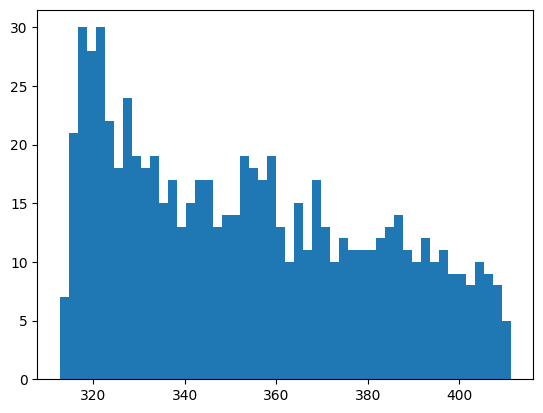

In [33]:
_=plt.hist(data_array[:,4],bins=50)

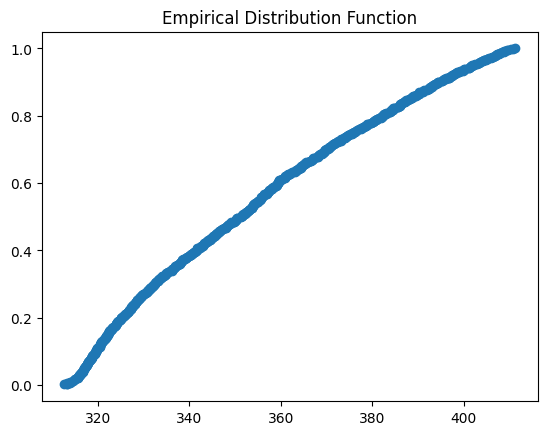

In [34]:
# EDF
from Utils import makeEDF, plotEDF
plotEDF(makeEDF(data_array[:,4]))